# The Spark's foundation GRIPDEC20

# Karandeep Singh Juneja

# TASK 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from sklearn import datasets
data=datasets.load_iris()
data=pd.DataFrame(data.data, columns=data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = data.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss: ",kmeans.inertia_)


k: 1 wcss:  681.3706
k: 2 wcss:  152.34795176035792
k: 3 wcss:  78.85144142614601
k: 4 wcss:  57.228473214285714
k: 5 wcss:  46.472230158730156
k: 6 wcss:  39.03998724608725
k: 7 wcss:  34.299712121212124
k: 8 wcss:  30.063110617452725
k: 9 wcss:  28.27172172856384
k: 10 wcss:  26.094324740540415


# THE ELBOW METHOD

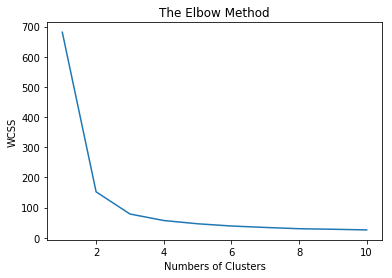

In [4]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

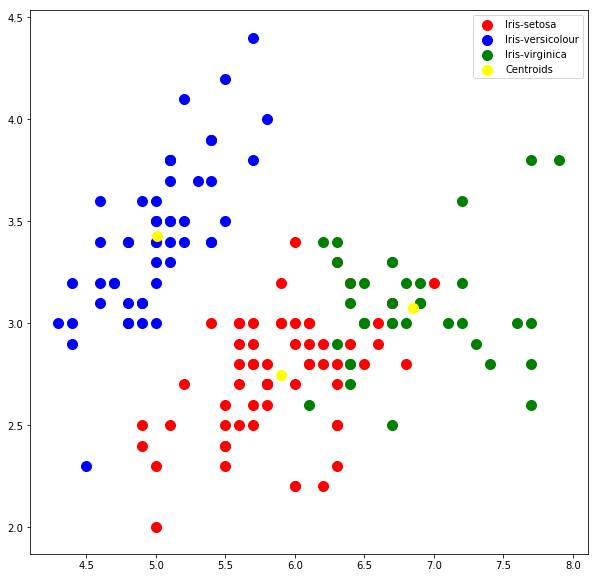

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()